### <font color='purple'><b>Importing libraries :

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score,precision_score,confusion_matrix,recall_score,accuracy_score,classification_report
from sklearn.metrics import RocCurveDisplay,precision_recall_curve,roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from collections import Counter
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### <font color='purple'><b>Read data :

In [2]:
df = pd.read_csv('resume_clean.csv')
df.head()

,clean_text,category
0,name ravali p curriculum vitae specialization ...,Internship
1,susovan bag seeking challenging position field...,Internship
2,kanumuru deepak reddycareer objectiveto secure...,ReactJS Developer
3,haripriya battina experience ui developer reac...,ReactJS Developer
4,kamalakar reddy linked professional summary 3 ...,ReactJS Developer


In [3]:
df['category'].value_counts()

ReactJS Developer    22
Workday              21
Peoplesoft           20
SQL Developer        14
Internship            2
Name: category, dtype: int64

#### <font color='magenta'><b>Split into independent and dependent varaiables :

In [4]:
x = df['clean_text'].values 
y = df['category'].values

#### <font color='magenta'><b>Split into Train and Test set :

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)

In [6]:
Counter(y_train), Counter(y_test)

(Counter({'ReactJS Developer': 17,
          'SQL Developer': 11,
          'Internship': 2,
          'Peoplesoft': 16,
          'Workday': 17}),
 Counter({'Workday': 4,
          'ReactJS Developer': 5,
          'SQL Developer': 3,
          'Peoplesoft': 4}))

In [7]:
Test = pd.DataFrame(x_test).to_csv("Test.csv",index=False,encoding='utf-8-sig')

### <font color='purple'><b>Feature Extraction :

#### <font color='magenta'><b>Tf-Idf Vectorizer :

In [8]:
tfidf_vector = TfidfVectorizer(sublinear_tf=True,stop_words='english')

In [9]:
x_train_tf = tfidf_vector.fit_transform(x_train)
x_test_tf = tfidf_vector.transform(x_test)

In [10]:
x_train_tf.shape, y_train.shape

((63, 6223), (63,))

In [11]:
x_test_tf.shape, y_test.shape

((16, 6223), (16,))

#### <font color='purple'><b>Saving the Vectorizer :

In [12]:
file = r'F:\tfidf.pkl'

In [13]:
pickle.dump(tfidf_vector,open(file,'wb'))

### <font color='purple'><b>Model building :

### <font color='magenta'><b>One vs Rest Classifier :

<font color='hotpink'><b><I>It fits one classifier per class. For each classifier, the class is fitted against all the other classes. It is a heuristic method for using binary classification algorithms for multi-class classification. It involves splitting the multi-class dataset into multiple binary classification problems.

### <font color='green'><b>Support Vector Machine Classifier :

In [14]:
clf = OneVsRestClassifier(SVC(kernel='linear',probability=True,random_state=0))
clf.fit(x_train_tf, y_train)

OneVsRestClassifier(estimator=SVC(kernel='linear', probability=True,
                                  random_state=0))

#### <font color='orange'><b>Model Evaluation :

#### <font color='green'>Train data :

#### <font color='peach'>Metrics :

In [15]:
y_pred_train = clf.predict(x_train_tf)

In [16]:
print(classification_report(y_train,y_pred_train))

                   precision    recall  f1-score   support

       Internship       1.00      1.00      1.00         2
       Peoplesoft       1.00      1.00      1.00        16
ReactJS Developer       1.00      1.00      1.00        17
    SQL Developer       1.00      1.00      1.00        11
          Workday       1.00      1.00      1.00        17

         accuracy                           1.00        63
        macro avg       1.00      1.00      1.00        63
     weighted avg       1.00      1.00      1.00        63



In [17]:
accuracy_tr = round(accuracy_score(y_train,y_pred_train),4)
precision_tr = round(precision_score(y_train,y_pred_train,average = 'macro'),4)
recall_tr = round(recall_score(y_train,y_pred_train, average = 'macro'),4)
f1_tr = round(f1_score(y_train,y_pred_train, average = 'macro'),4)

In [18]:
print('Accuracy Score  : ', accuracy_tr)
print('Precision Score : ', precision_tr)
print('Recall Score    : ', recall_tr)
print('f1-Score        : ', f1_tr)

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


#### <font color='hotpink'><b>Accuracy of Model with Cross-Validation for Training data:

In [19]:
accuracy1 = cross_val_score(clf,x_train_tf,y_train,scoring='accuracy',cv=10)
print(accuracy1)

[1.         1.         1.         1.         1.         1.
 1.         1.         0.83333333 0.83333333]


In [20]:
accuracy1c = np.round(accuracy1.mean()*100)
print('Accuracy of Model with Cross Validation is:',accuracy1c)

Accuracy of Model with Cross Validation is: 97.0


#### <font color='green'>Test data :

In [21]:
y_pred = clf.predict(x_test_tf)

In [22]:
print(y_pred)

['Workday' 'ReactJS Developer' 'Workday' 'SQL Developer' 'Peoplesoft'
 'ReactJS Developer' 'Peoplesoft' 'Peoplesoft' 'ReactJS Developer'
 'ReactJS Developer' 'Workday' 'ReactJS Developer' 'Peoplesoft'
 'SQL Developer' 'SQL Developer' 'Workday']


In [23]:
y_p = clf.predict(x_test_tf)

In [24]:
x_test_tf

<16x6223 sparse matrix of type '<class 'numpy.float64'>'
	with 3338 stored elements in Compressed Sparse Row format>

#### <font color='peach'><b>Metrics :

In [25]:
print(classification_report(y_test,y_pred))

                   precision    recall  f1-score   support

       Peoplesoft       1.00      1.00      1.00         4
ReactJS Developer       1.00      1.00      1.00         5
    SQL Developer       1.00      1.00      1.00         3
          Workday       1.00      1.00      1.00         4

         accuracy                           1.00        16
        macro avg       1.00      1.00      1.00        16
     weighted avg       1.00      1.00      1.00        16



In [26]:
accuracy_sv = round(accuracy_score(y_test,y_pred),4)
precision_sv = round(precision_score(y_test,y_pred,average = 'macro'),4)
recall_sv = round(recall_score(y_test,y_pred, average = 'macro'),4)
f1_sv = round(f1_score(y_test,y_pred, average = 'macro'),4)

In [27]:
print('Accuracy Score  : ', accuracy_sv)
print('Precision Score : ', precision_sv)
print('Recall Score    : ', recall_sv)
print('f1-Score        : ', f1_sv)

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


<font color='maroon'><b>F1 Score becomes 1 only when precision and recall are both 1.
    
<font color='maroon'><b>A Precision of 1 indicates the model produces no False Positives.
    
<font color='maroon'><b>A recall of 1 indicates the model produces no False Negatives

#### <font color='peach'><b>Confusion Matrix :

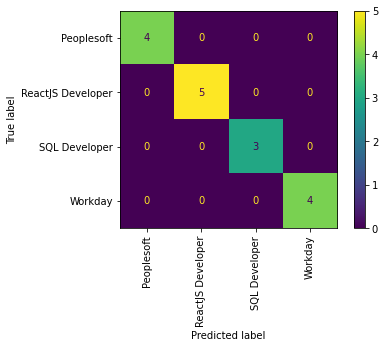

In [28]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,xticks_rotation='vertical')
plt.grid(False);

In [29]:
from PIL import ImageGrab
ImageGrab.grabclipboard()

<font color='orange'><b><I>Predicting Probabilities :

In [30]:
y_score = clf.predict_proba(x_test_tf)
y_score

array([[0.07238931, 0.00401706, 0.00423392, 0.01053945, 0.90882025],
       [0.05450815, 0.00400833, 0.93001834, 0.00392926, 0.00753593],
       [0.07790243, 0.00444527, 0.00303864, 0.00454896, 0.91006471],
       [0.10444143, 0.01355713, 0.00198197, 0.86712943, 0.01289004],
       [0.04001683, 0.88800626, 0.02875324, 0.0111428 , 0.03208088],
       [0.01022709, 0.03988094, 0.93001222, 0.00691141, 0.01296835],
       [0.06191862, 0.91606878, 0.00241626, 0.00442738, 0.01516896],
       [0.05748333, 0.9268136 , 0.00249404, 0.00321132, 0.0099977 ],
       [0.01238671, 0.01064173, 0.95489887, 0.01022296, 0.01184972],
       [0.01925832, 0.00662514, 0.93532367, 0.01119729, 0.02759557],
       [0.06071379, 0.0111224 , 0.00212074, 0.00241997, 0.92362311],
       [0.08859047, 0.00387118, 0.89649741, 0.00379097, 0.00724997],
       [0.07823701, 0.90483905, 0.00259049, 0.00360281, 0.01073065],
       [0.04242643, 0.02102265, 0.04715726, 0.87168343, 0.01771024],
       [0.10698623, 0.02082269, 0.

#### <font color='brown'><b>Label Binarize :

In [31]:
lb = LabelBinarizer().fit(y_train)
y_onehot_test = lb.transform(y_test)
y_onehot_test.shape

(16, 5)

#### <font color='brown'><b>ROC-AUC Score :

In [32]:
# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
1.00


#### <font color='brown'><b>ROC-AUC Curve :

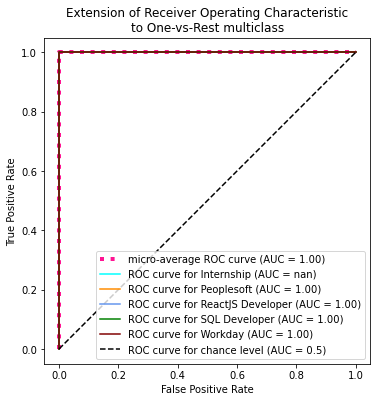

In [33]:
from itertools import cycle
n_classes = len(np.unique(y))
fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)


colors = cycle(["aqua", "darkorange", "cornflowerblue","green","maroon"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for {np.unique(y)[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()

<font color='maroon'><b><I>AUC of 0.5 suggests no discrimination. Here AUC=1 indicates the predictions are 100 percent correct. 

#### <font color='brown'><b>Precision Recall Curve :

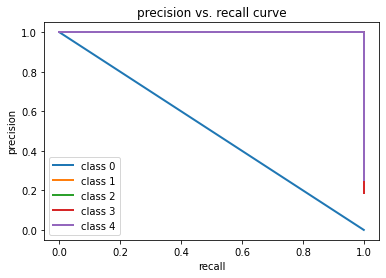

In [34]:
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_onehot_test[:, i],
                                                        y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

<font color='maroon'><b><I>A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

### <font color='green'><b>Naive-Bayes Classifier :

In [35]:
clf2 = OneVsRestClassifier(MultinomialNB())
clf2.fit(x_train_tf,y_train)

OneVsRestClassifier(estimator=MultinomialNB())

#### <font color='orange'><b>Model Evaluation :

#### <font color='green'><b>Train data:

#### <font color='peach'><b>Metrics :

In [36]:
y_pred_train2 = clf2.predict(x_train_tf)

In [37]:
print(classification_report(y_train,y_pred_train2))

                   precision    recall  f1-score   support

       Internship       0.00      0.00      0.00         2
       Peoplesoft       1.00      1.00      1.00        16
ReactJS Developer       0.89      1.00      0.94        17
    SQL Developer       1.00      1.00      1.00        11
          Workday       1.00      1.00      1.00        17

         accuracy                           0.97        63
        macro avg       0.78      0.80      0.79        63
     weighted avg       0.94      0.97      0.95        63



#### <font color='hotpink'><b>Accuracy of Model with Cross-Validation for Training data:

In [38]:
accuracy2 = cross_val_score(clf2,x_train_tf,y_train,scoring='accuracy',cv=10)
print(accuracy2)

[0.85714286 1.         0.57142857 0.66666667 0.83333333 1.
 1.         0.66666667 0.83333333 0.83333333]


In [39]:
accuracy2c = np.round(accuracy2.mean()*100)
print('Accuracy of Model with Cross Validation is:',accuracy2c)

Accuracy of Model with Cross Validation is: 83.0


#### <font color='green'><b>Test data :

#### <font color='peach'><b>Metrics :

In [40]:
y_pred2 = clf2.predict(x_test_tf)

In [41]:
print(classification_report(y_test,y_pred2))

                   precision    recall  f1-score   support

       Peoplesoft       1.00      1.00      1.00         4
ReactJS Developer       1.00      1.00      1.00         5
    SQL Developer       1.00      0.67      0.80         3
          Workday       0.80      1.00      0.89         4

         accuracy                           0.94        16
        macro avg       0.95      0.92      0.92        16
     weighted avg       0.95      0.94      0.93        16



In [42]:
accuracy_n = round(accuracy_score(y_test,y_pred2),4)
precision_n = round(precision_score(y_test,y_pred2,average = 'macro'),4)
recall_n = round(recall_score(y_test,y_pred2, average = 'macro'),4)
f1_n = round(f1_score(y_test,y_pred2, average = 'macro'),4)

In [43]:
print('Accuracy Score  : ', accuracy_n)
print('Precision Score : ', precision_n)
print('Recall Score    : ', recall_n)
print('f1-Score        : ', f1_n)

Accuracy Score  :  0.9375
Precision Score :  0.95
Recall Score    :  0.9167
f1-Score        :  0.9222


#### <font color='peach'><b>Confusion Matrix :

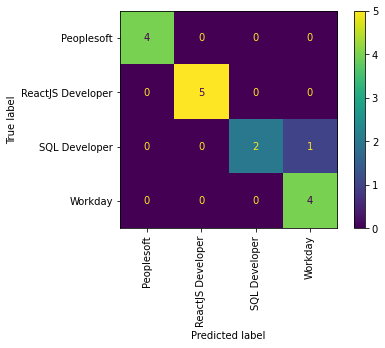

In [44]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred2,xticks_rotation='vertical')
plt.grid(False);

<font color='orange'><b><I>Predicting Probabilities :

In [45]:
y_score2 = clf2.predict_proba(x_test_tf)
y_score2

array([[1.31431221e-03, 3.33590934e-02, 2.36883829e-02, 1.68009164e-02,
        9.24837295e-01],
       [5.59268534e-03, 7.84673250e-02, 7.74705994e-01, 4.95204470e-02,
        9.17135483e-02],
       [4.73068742e-04, 1.94686846e-02, 1.22889433e-02, 8.03750612e-03,
        9.59731797e-01],
       [4.51851271e-03, 1.19970023e-01, 7.47178515e-02, 6.11634271e-01,
        1.89159341e-01],
       [3.91992035e-03, 4.81257292e-01, 1.57557870e-01, 5.53570378e-02,
        3.01907880e-01],
       [6.91022364e-03, 1.27765670e-01, 6.35302921e-01, 5.97050747e-02,
        1.70316111e-01],
       [1.98329126e-03, 8.10864395e-01, 3.81681978e-02, 2.51377233e-02,
        1.23846393e-01],
       [2.05259867e-03, 8.66988403e-01, 3.13444236e-02, 2.13927584e-02,
        7.82218160e-02],
       [5.47983605e-03, 9.57727625e-02, 6.89588358e-01, 5.66264119e-02,
        1.52532631e-01],
       [4.94498162e-03, 9.56504042e-02, 6.10211874e-01, 5.56150150e-02,
        2.33577725e-01],
       [2.72519658e-04, 1.2603

#### <font color='brown'><b>ROC-AUC Score :

In [46]:
# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score2.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
1.00


#### <font color='brown'><b>ROC-AUC Curve :

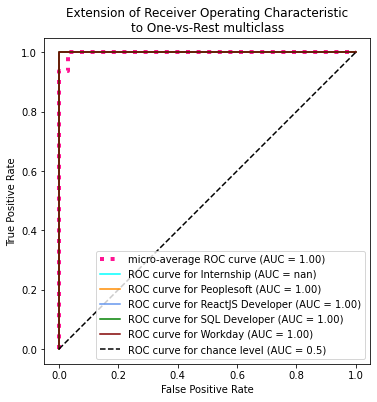

In [47]:
fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)


colors = cycle(["aqua", "darkorange", "cornflowerblue","green","maroon"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score2[:, class_id],
        name=f"ROC curve for {np.unique(y)[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()

#### <font color='brown'><b>Precision Recall Curve :

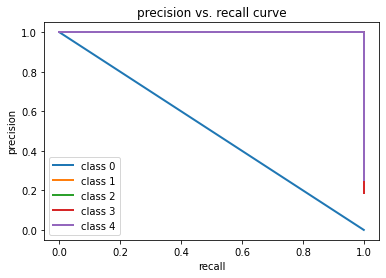

In [48]:
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_onehot_test[:, i],
                                                        y_score2[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

#### <font color='hotpink'><b>Comparison of SVM and Naive-Bayes :

In [49]:
table = {'Classifier' : ['SVM Classifier', 'Naive-Bayes Classifier'], 
         'Accuracy' : [accuracy_sv, accuracy_n], 
         'Precision Score' : [precision_sv, precision_n], 
         'Recall Score' : [recall_sv, recall_n], 
         'F1_Score' : [f1_sv, f1_n]}
table = pd.DataFrame(table)
table.sort_values(["Accuracy"],ascending=False,inplace = True, ignore_index=True)
table

,Classifier,Accuracy,Precision Score,Recall Score,F1_Score
0,SVM Classifier,1.0000,1.00,1.0000,1.0000
1,Naive-Bayes Classifier,0.9375,0.95,0.9167,0.9222


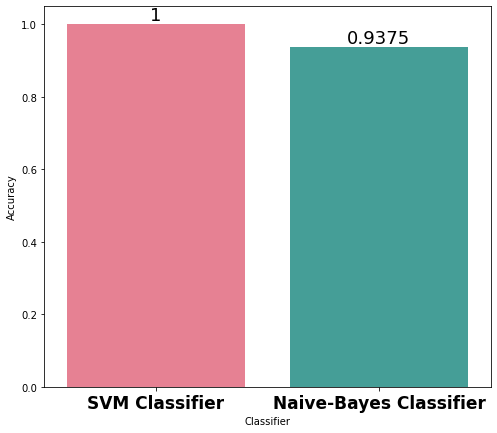

In [50]:
plt.figure(figsize=(8,7))
ax = sns.barplot(data=table,y='Accuracy',x='Classifier',palette='husl',ci=None)
plt.xticks(fontsize=17,fontweight='bold');
for i in ax.containers:
    ax.bar_label(i,fontsize=18)

#### <font color='hotpink'><b>Accuracy after Cross-Validation :

In [51]:
table3 = {'Classifier' : ['SVM Classifier', 'Naive-Bayes Classifier'], 
         'Accuracy' : [accuracy1c, accuracy2c]}
table3 = pd.DataFrame(table3)
table3

,Classifier,Accuracy
0,SVM Classifier,97.0
1,Naive-Bayes Classifier,83.0


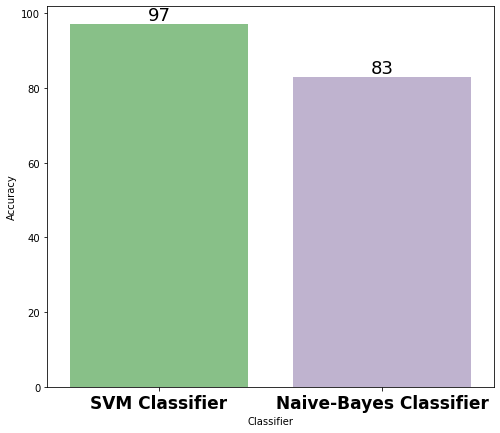

In [52]:
table3.sort_values(["Accuracy"],ascending=False,inplace = True, ignore_index=True)
plt.figure(figsize=(8,7))
ax = sns.barplot(data=table3,y='Accuracy',x='Classifier',palette='Accent',ci=None)
plt.xticks(fontsize=17,fontweight='bold');
for i in ax.containers:
    ax.bar_label(i,fontsize=18)

<font color='maroon'><b><I>NB gives good results when applied to short texts but SVM is more powerful to address non-linear classification tasks and generalizes well in high dimensional spaces like those corresponding to texts.

### <font color='purple'><b>Other Classifiers :

#### <font color='orange'><b>Tree Classifiers :

### <font color='green'><b>Decision Tree Classifier :

In [53]:
dt = OneVsRestClassifier(DecisionTreeClassifier(max_depth=3))
dt.fit(x_train_tf,y_train)
predict_d = dt.predict(x_test_tf)

In [54]:
predict_dt = dt.predict(x_train_tf)

#### <font color='peach'><b>Metrics :

#### <font color='green'><b>Train data :

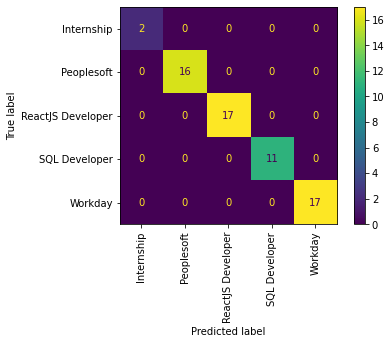

In [55]:
ConfusionMatrixDisplay.from_predictions(y_train,predict_dt,xticks_rotation='vertical')
plt.grid(False);

In [56]:
print(classification_report(y_train,predict_dt))

                   precision    recall  f1-score   support

       Internship       1.00      1.00      1.00         2
       Peoplesoft       1.00      1.00      1.00        16
ReactJS Developer       1.00      1.00      1.00        17
    SQL Developer       1.00      1.00      1.00        11
          Workday       1.00      1.00      1.00        17

         accuracy                           1.00        63
        macro avg       1.00      1.00      1.00        63
     weighted avg       1.00      1.00      1.00        63



#### <font color='hotpink'><b>Accuracy of Model with Cross-Validation for Training data:

In [57]:
accuracy3 = cross_val_score(dt,x_train_tf,y_train,scoring='accuracy',cv=10)
print(accuracy3)

[0.71428571 0.85714286 0.85714286 0.66666667 0.83333333 1.
 1.         1.         0.83333333 0.83333333]


In [58]:
accuracy3c = np.round(accuracy3.mean()*100)
print('Accuracy of Model with Cross Validation is:',accuracy3c)

Accuracy of Model with Cross Validation is: 86.0


#### <font color='green'><b>Test data :

In [59]:
cm_d = confusion_matrix(y_test,predict_d)
cm_d

array([[4, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]], dtype=int64)

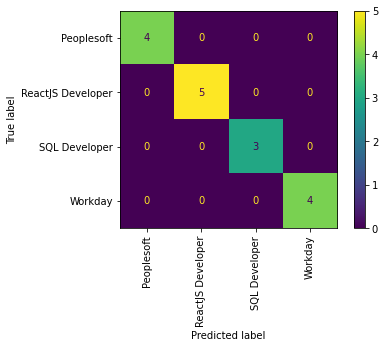

In [60]:
ConfusionMatrixDisplay.from_predictions(y_test,predict_d,xticks_rotation='vertical')
plt.grid(False);

In [61]:
print(classification_report(y_test,predict_d))

                   precision    recall  f1-score   support

       Peoplesoft       1.00      1.00      1.00         4
ReactJS Developer       1.00      1.00      1.00         5
    SQL Developer       1.00      1.00      1.00         3
          Workday       1.00      1.00      1.00         4

         accuracy                           1.00        16
        macro avg       1.00      1.00      1.00        16
     weighted avg       1.00      1.00      1.00        16



In [62]:
accuracy_d = round(accuracy_score(y_test,predict_d),4)
precision_d = round(precision_score(y_test,predict_d,average = 'macro'),4)
recall_d = round(recall_score(y_test,predict_d, average = 'macro'),4)
f1_d = round(f1_score(y_test,predict_d, average = 'macro'),4)

In [63]:
print('Accuracy Score  : ', accuracy_d)
print('Precision Score : ', precision_d)
print('Recall Score    : ', recall_d)
print('f1-Score        : ', f1_d)

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


### <font color='green'><b> Random Forest Classifier :

In [64]:
rf = OneVsRestClassifier(RandomForestClassifier())
rf.fit(x_train_tf,y_train)
predict_r = rf.predict(x_test_tf)

In [65]:
predict_rt = rf.predict(x_train_tf)

#### <font color='peach'><b>Metrics :

#### <font color='green'><b>Train data :

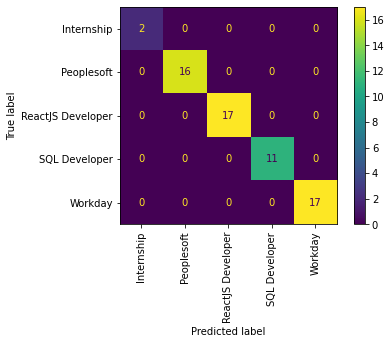

In [66]:
ConfusionMatrixDisplay.from_predictions(y_train,predict_rt,xticks_rotation='vertical')
plt.grid(False);

In [67]:
print(classification_report(y_train,predict_rt))

                   precision    recall  f1-score   support

       Internship       1.00      1.00      1.00         2
       Peoplesoft       1.00      1.00      1.00        16
ReactJS Developer       1.00      1.00      1.00        17
    SQL Developer       1.00      1.00      1.00        11
          Workday       1.00      1.00      1.00        17

         accuracy                           1.00        63
        macro avg       1.00      1.00      1.00        63
     weighted avg       1.00      1.00      1.00        63



#### <font color='hotpink'><b>Accuracy of Model with Cross-Validation for Training data:

In [68]:
accuracy4 = cross_val_score(rf,x_train_tf,y_train,scoring='accuracy',cv=10)
print(accuracy4)

[1.         1.         0.85714286 1.         1.         1.
 1.         1.         0.83333333 0.83333333]


In [69]:
accuracy4c = np.round(accuracy4.mean()*100)
print('Accuracy of Model with Cross Validation is:',accuracy4c)

Accuracy of Model with Cross Validation is: 95.0


#### <font color='green'><b>Test data :

In [70]:
cm_r = confusion_matrix(y_test,predict_r)
cm_r

array([[4, 0, 0, 0],
       [0, 5, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]], dtype=int64)

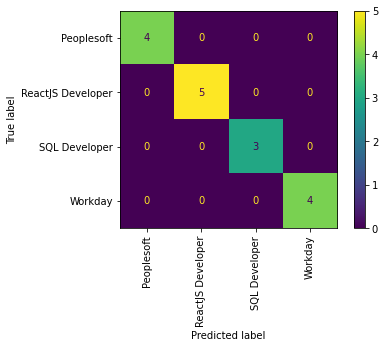

In [71]:
ConfusionMatrixDisplay.from_predictions(y_test,predict_r,xticks_rotation='vertical')
plt.grid(False);

In [72]:
print(classification_report(y_test,predict_r))

                   precision    recall  f1-score   support

       Peoplesoft       1.00      1.00      1.00         4
ReactJS Developer       1.00      1.00      1.00         5
    SQL Developer       1.00      1.00      1.00         3
          Workday       1.00      1.00      1.00         4

         accuracy                           1.00        16
        macro avg       1.00      1.00      1.00        16
     weighted avg       1.00      1.00      1.00        16



In [73]:
accuracy_r = round(accuracy_score(y_test,predict_r),4)
precision_r = round(precision_score(y_test,predict_r,average = 'macro'),4)
recall_r = round(recall_score(y_test,predict_r, average = 'macro'),4)
f1_r = round(f1_score(y_test,predict_r, average = 'macro'),4)

In [74]:
print('Accuracy Score  : ', accuracy_r)
print('Precision Score : ', precision_r)
print('Recall Score    : ', recall_r)
print('f1-Score        : ', f1_r)

Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
f1-Score        :  1.0


#### <font color='hotpink'><b>Cross-Validation Accuracies of DecisionTree and RandomForest Classifiers :

In [75]:
table4 = {'Classifier' : ['DecisionTree Classifier', 'RandomForest Classifier'], 
         'Accuracy' : [accuracy3c, accuracy4c]}
table4 = pd.DataFrame(table4)
table4

,Classifier,Accuracy
0,DecisionTree Classifier,86.0
1,RandomForest Classifier,95.0


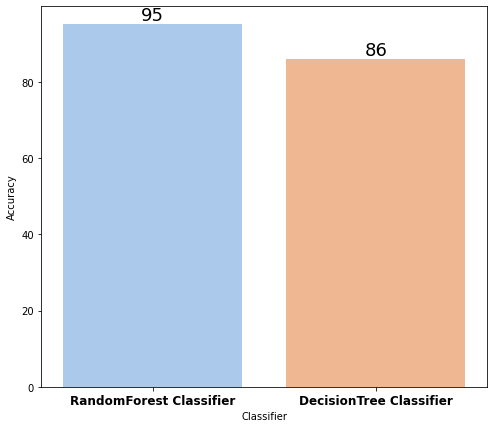

In [76]:
table4.sort_values(["Accuracy"],ascending=False,inplace = True, ignore_index=True)
plt.figure(figsize=(8,7))
ax = sns.barplot(data=table4,y='Accuracy',x='Classifier',palette='pastel',ci=None)
plt.xticks(fontsize=12,fontweight='bold');
for i in ax.containers:
    ax.bar_label(i,fontsize=18)

<font color='maroon'><b><I>Though RandomForest and DecisionTree Classifiers give good accuracy, decision tree needs several key nodes which is hard to find 'several key tokens' at higher dimensions and random forest performs bad for high sparse dimensions.

#### <font color='orange'><b>Boosting Algorithms :

#### <font color='green'><b>AdaBoost Classifier :

In [77]:
ab = AdaBoostClassifier()
ab.fit(x_train_tf,y_train)
predict_a = ab.predict(x_test_tf)

In [78]:
accuracy_a = accuracy_score(y_test,predict_a)
accuracy_a

0.5625

In [79]:
cm_a = confusion_matrix(y_test,predict_a)
cm_a

array([[0, 0, 0, 0, 0],
       [0, 0, 4, 0, 0],
       [3, 0, 2, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 4]], dtype=int64)

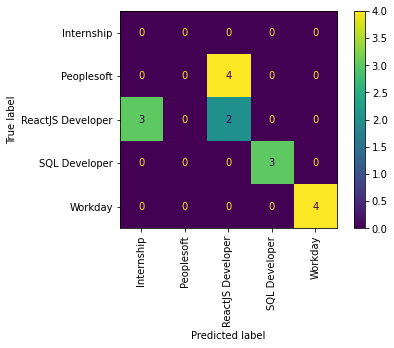

In [80]:
ConfusionMatrixDisplay.from_predictions(y_test,predict_a,xticks_rotation='vertical')
plt.grid(False);

In [81]:
print(classification_report(y_test,predict_a))

                   precision    recall  f1-score   support

       Internship       0.00      0.00      0.00         0
       Peoplesoft       0.00      0.00      0.00         4
ReactJS Developer       0.33      0.40      0.36         5
    SQL Developer       1.00      1.00      1.00         3
          Workday       1.00      1.00      1.00         4

         accuracy                           0.56        16
        macro avg       0.47      0.48      0.47        16
     weighted avg       0.54      0.56      0.55        16



In [82]:
accuracy_a = round(accuracy_score(y_test,predict_a),4)
precision_a = round(precision_score(y_test,predict_a,average = 'macro'),4)
recall_a = round(recall_score(y_test,predict_a, average = 'macro'),4)
f1_a = round(f1_score(y_test,predict_a, average = 'macro'),4)

In [83]:
print('Accuracy Score  : ', accuracy_a)
print('Precision Score : ', precision_a)
print('Recall Score    : ', recall_a)
print('f1-Score        : ', f1_a)

Accuracy Score  :  0.5625
Precision Score :  0.4667
Recall Score    :  0.48
f1-Score        :  0.4727


#### <font color='green'><b>GradientBoosting Classifier :

In [84]:
gd = GradientBoostingClassifier()
gd.fit(x_train_tf,y_train)
predict_g = gd.predict(x_test_tf)

In [85]:
accuracy_g = accuracy_score(y_test,predict_g)
accuracy_g

0.8125

In [86]:
cm_g = confusion_matrix(y_test,predict_g)
cm_g

array([[0, 0, 0, 0, 0],
       [0, 4, 0, 0, 0],
       [3, 0, 2, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 4]], dtype=int64)

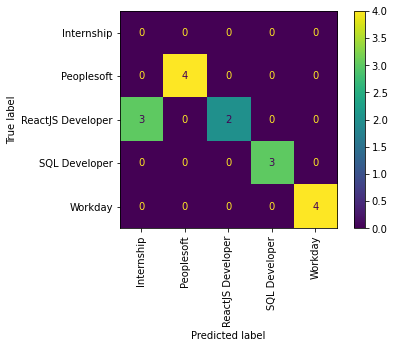

In [87]:
ConfusionMatrixDisplay.from_predictions(y_test,predict_g,xticks_rotation='vertical')
plt.grid(False);

In [88]:
print(classification_report(y_test,predict_g))

                   precision    recall  f1-score   support

       Internship       0.00      0.00      0.00         0
       Peoplesoft       1.00      1.00      1.00         4
ReactJS Developer       1.00      0.40      0.57         5
    SQL Developer       1.00      1.00      1.00         3
          Workday       1.00      1.00      1.00         4

         accuracy                           0.81        16
        macro avg       0.80      0.68      0.71        16
     weighted avg       1.00      0.81      0.87        16



In [89]:
accuracy_g = round(accuracy_score(y_test,predict_g),4)
precision_g = round(precision_score(y_test,predict_g,average = 'macro'),4)
recall_g = round(recall_score(y_test,predict_g, average = 'macro'),4)
f1_g = round(f1_score(y_test,predict_g, average = 'macro'),4)

In [90]:
print('Accuracy Score  : ', accuracy_g)
print('Precision Score : ', precision_g)
print('Recall Score    : ', recall_g)
print('f1-Score        : ', f1_g)

Accuracy Score  :  0.8125
Precision Score :  0.8
Recall Score    :  0.68
f1-Score        :  0.7143


#### <font color='green'><b>XGBoost Classifier :

In [91]:
le = LabelEncoder()

In [92]:
df_xg = df.copy()
df_xg['category']=le.fit_transform(df_xg['category'])
df_xg.head()

,clean_text,category
0,name ravali p curriculum vitae specialization ...,0
1,susovan bag seeking challenging position field...,0
2,kanumuru deepak reddycareer objectiveto secure...,2
3,haripriya battina experience ui developer reac...,2
4,kamalakar reddy linked professional summary 3 ...,2


In [93]:
df_xg['category'].value_counts()

2    22
4    21
1    20
3    14
0     2
Name: category, dtype: int64

In [94]:
x_xg = df_xg['clean_text'].values 
y_xg = df_xg['category'].values

In [95]:
x_train_xg,x_test_xg,y_train_xg,y_test_xg = train_test_split(x_xg,y_xg,test_size=0.2,random_state=0,shuffle=True)

In [96]:
xg = XGBClassifier()
xg.fit(x_train_tf,y_train_xg)
predict_x = xg.predict(x_test_tf)

In [97]:
accuracy_x = accuracy_score(y_test_xg,predict_x)
accuracy_x

0.375

In [98]:
cm_x = confusion_matrix(y_test_xg,predict_x)
cm_x

array([[2, 3, 0, 0],
       [1, 0, 0, 0],
       [2, 0, 1, 0],
       [0, 4, 0, 3]], dtype=int64)

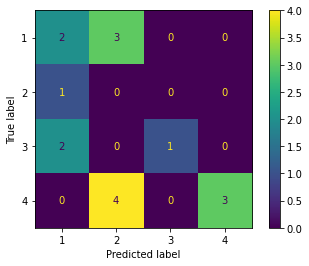

In [99]:
ConfusionMatrixDisplay.from_predictions(y_test_xg,predict_x)
plt.grid(False);

In [100]:
print(classification_report(y_test_xg,predict_x))

              precision    recall  f1-score   support

           1       0.40      0.40      0.40         5
           2       0.00      0.00      0.00         1
           3       1.00      0.33      0.50         3
           4       1.00      0.43      0.60         7

    accuracy                           0.38        16
   macro avg       0.60      0.29      0.38        16
weighted avg       0.75      0.38      0.48        16



In [101]:
accuracy_x = round(accuracy_score(y_test_xg,predict_x),4)
precision_x = round(precision_score(y_test_xg,predict_x,average = 'macro'),4)
recall_x = round(recall_score(y_test_xg,predict_x, average = 'macro'),4)
f1_x = round(f1_score(y_test_xg,predict_x, average = 'macro'),4)

In [102]:
print('Accuracy Score  : ', accuracy_x)
print('Precision Score : ', precision_x)
print('Recall Score    : ', recall_x)
print('f1-Score        : ', f1_x)

Accuracy Score  :  0.375
Precision Score :  0.6
Recall Score    :  0.2905
f1-Score        :  0.375


#### <font color='green'><b>LGBM-Boosting Classifier :

In [103]:
lgbm = LGBMClassifier()
lgbm.fit(x_train_tf,y_train)
predict_l = lgbm.predict(x_test_tf)

In [104]:
accuracy_l = accuracy_score(y_test,predict_l)
accuracy_l

0.8125

In [105]:
cm_l = confusion_matrix(y_test,predict_l)
cm_l

array([[0, 0, 0, 0, 0],
       [0, 3, 0, 1, 0],
       [2, 0, 3, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 4]], dtype=int64)

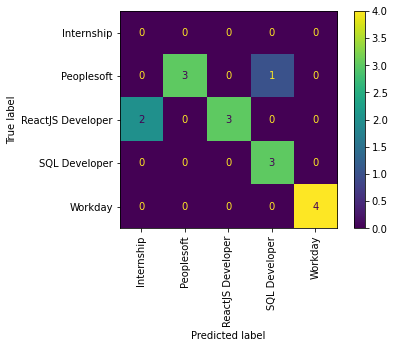

In [106]:
ConfusionMatrixDisplay.from_predictions(y_test,predict_l,xticks_rotation='vertical')
plt.grid(False);

In [107]:
print(classification_report(y_test,predict_l))

                   precision    recall  f1-score   support

       Internship       0.00      0.00      0.00         0
       Peoplesoft       1.00      0.75      0.86         4
ReactJS Developer       1.00      0.60      0.75         5
    SQL Developer       0.75      1.00      0.86         3
          Workday       1.00      1.00      1.00         4

         accuracy                           0.81        16
        macro avg       0.75      0.67      0.69        16
     weighted avg       0.95      0.81      0.86        16



In [108]:
accuracy_l = round(accuracy_score(y_test,predict_l),4)
precision_l = round(precision_score(y_test,predict_l,average = 'macro'),4)
recall_l = round(recall_score(y_test,predict_l, average = 'macro'),4)
f1_l = round(f1_score(y_test,predict_l, average = 'macro'),4)

In [109]:
print('Accuracy Score  : ', accuracy_l)
print('Precision Score : ', precision_l)
print('Recall Score    : ', recall_l)
print('f1-Score        : ', f1_l)

Accuracy Score  :  0.8125
Precision Score :  0.75
Recall Score    :  0.67
f1-Score        :  0.6929


#### <font color='purple'><b>Comparison of all Classifiers :

In [110]:
table2 = {'Classifier' : ['SVM classifier','Naive-Bayes Classifier','Random Forest Classifier','Decision Tree Classifier',
                          'AdaBoost Classifier','Gradient Boosting Classifier','Xtreme Gradient Boosting Classifier', 
                         'Light Gradient Boosting Classifier'], 
         'Accuracy' : [accuracy_sv,accuracy_n,accuracy_r, accuracy_d, accuracy_a, accuracy_g, accuracy_x, accuracy_l], 
         'Precision Score' : [precision_sv,precision_n,precision_r,precision_d, precision_a, precision_g, 
                              precision_x, precision_l], 
         'Recall Score' : [recall_sv,recall_n,recall_r, recall_d,recall_a, recall_g, recall_x, recall_l], 
         'F1_Score' : [f1_sv,f1_n,f1_r,f1_d, f1_a, f1_g, f1_x, f1_l]}
table2 = pd.DataFrame(table2)
table2.sort_values(["Accuracy"],ascending=False,inplace = True, ignore_index=True)
table2

,Classifier,Accuracy,Precision Score,Recall Score,F1_Score
0,SVM classifier,1.0000,1.0000,1.0000,1.0000
1,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000
2,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000
3,Naive-Bayes Classifier,0.9375,0.9500,0.9167,0.9222
4,Gradient Boosting Classifier,0.8125,0.8000,0.6800,0.7143
5,Light Gradient Boosting Classifier,0.8125,0.7500,0.6700,0.6929
6,AdaBoost Classifier,0.5625,0.4667,0.4800,0.4727
7,Xtreme Gradient Boosting Classifier,0.3750,0.6000,0.2905,0.3750


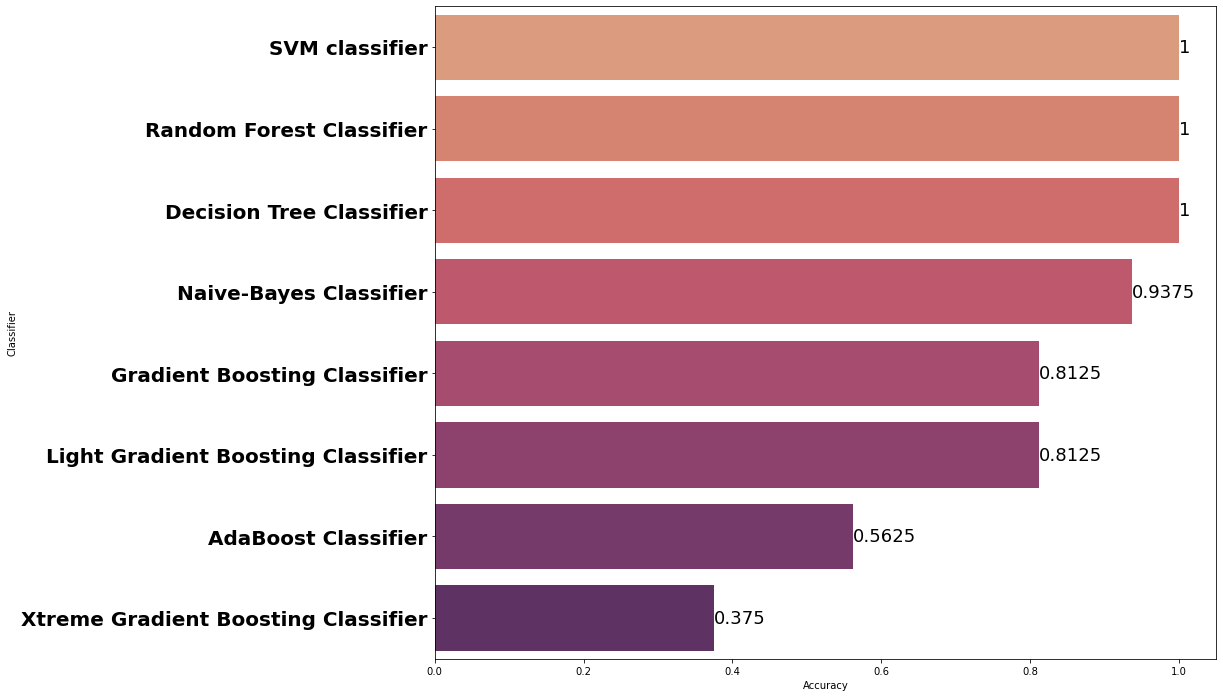

In [111]:
plt.figure(figsize=(14,12))
ax = sns.barplot(data=table2,x='Accuracy',y='Classifier',palette='flare',ci=None)
plt.yticks(fontsize=20,fontweight='bold');
for i in ax.containers:
    ax.bar_label(i,fontsize=18)

### <font color='purple'><b>Saving the best model :

#### <font color='magenta'><b><I>Support Vector Machine Classifier :

<font color='hotpink'><b><I>SVMs generalize well in high dimensional feature spaces which eliminate the need for feature selection, making the ap- plication of text categorization considerably easier.

In [112]:
filename = 'F:\model_svm.pkl'

In [113]:
pickle.dump(clf,open(filename,'wb'))